# Einrichten & Datenimport

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import math

In [2]:
df = pd.read_csv("../data/data.csv")

# Daten aufbereiten

Alle Einträge ohne Tracking-Daten können nicht richtig ausgewertet werden. Deshalb werden sie entfernt.

In [3]:
# Entferne alle Einträge, die keine Tracking-Daten beinhalten
df = df.dropna(subset=["reading_duration", "reading_count", "questions_duration"])

In [4]:
# Millisekunden -> Sekunden
df["reading_duration"] = df.apply(lambda row: row["reading_duration"] / 1000, axis=1)
df["questions_duration"] = df.apply(lambda row: float(row["questions_duration"]) / 1000, axis=1)

Für die Antworten für die Fragebögen (Bionic Reading und persönliche Fragen) sind nur als Index gespeichert. Sie müssen noch umgewandelt werden.

In [5]:
def index_to_label(col, label):
    df[col] = df[col].map(lambda i: "" if math.isnan(i) else label[int(i)])

In [6]:
bionic_schneller_labels = ["Deutlich schneller", "Schneller", "Kein Unterschied", "Langsamer", "Deutlich langsamer"]
index_to_label("bionic_schneller", bionic_schneller_labels)

In [7]:
bionic_leichter_labels = ["Deutlich leichter", "Leichter", "Kein Unterschied", "Schwerer", "Deutlich schwerer"]
index_to_label("bionic_leichter", bionic_leichter_labels)

In [8]:
bionic_textverstaendnis_labels = ["Überhaupt nicht", "Ein wenig", "Viel", "Sehr viel"]
index_to_label("bionic_textverstaendnis", bionic_textverstaendnis_labels)

In [9]:
bionic_woerter_finden_labels = ["Überhaupt nicht", "Ein wenig", "Viel", "Sehr viel"]
index_to_label("bionic_woerter_finden", bionic_woerter_finden_labels)

In [10]:
bionic_mehr_texte_labels = ["Ja", "Nein"]
index_to_label("bionic_mehr_texte", bionic_mehr_texte_labels)

In [11]:
bionic_in_schule_labels = ["Ja", "Nein"]
index_to_label("bionic_in_schule", bionic_in_schule_labels)

In [12]:
persoenlich_textverstaendnis_labels = ["Leicht", "Eher leicht", "Ok", "Eher schwer", "Schwer"]
index_to_label("persoenlich_textverstaendnis", persoenlich_textverstaendnis_labels)

In [13]:
persoenlich_freude_lesen_labels = ["Nicht sehr gerne", "Nicht gerne", "Neutral", "Gerne", "Sehr gerne"]
index_to_label("persoenlich_freude_lesen", persoenlich_freude_lesen_labels)

In [14]:
persoenlich_haeufigkeit_lesen_labels = ["Nicht sehr oft", "Nicht oft", "Gelegentlich", "Oft", "Sehr oft"]
index_to_label("persoenlich_haeufigkeit_lesen", persoenlich_haeufigkeit_lesen_labels)

In [15]:
persoenlich_ziel_lesen_labels = ["Nein", "Ich will mehr lesen", "Ich will weniger lesen"]
index_to_label("persoenlich_ziel_lesen", persoenlich_ziel_lesen_labels)

In [16]:
df.reading_count = df.reading_count.astype(int)

In [17]:
altersgruppen_dict = {
    12.0: "12–13",
    13.0: "12–13",
    17.0: "17–19",
    18.0: "17–19",
    19.0: "17–19",
    21.0: "Keine Angabe", # Nicht genug Einträge
    np.nan: "Keine Angabe"
}

df["altersgruppe"] = df["persoenlich_alter"].map(altersgruppen_dict)

Alle Einträge, die mehrfach die gleiche ID verwenden:

In [18]:
duplicated_entries = df[df.duplicated("id", keep=False)]
duplicated_entries.sort_values(by="id")

id                       fingerprint  \
4   1c20b10b-7b40-4f72-ad62-d0f82dffe16c  3f9e59cdd2fbc071de73b4cf87d21eb8   
5   1c20b10b-7b40-4f72-ad62-d0f82dffe16c  3f9e59cdd2fbc071de73b4cf87d21eb8   
86  2eeeab3e-7ba6-4797-8ab5-a1f66651c17a  b8e5e010a46c8e7e722ec87c63c9e0cb   
87  2eeeab3e-7ba6-4797-8ab5-a1f66651c17a  b8e5e010a46c8e7e722ec87c63c9e0cb   
28  3a6de92b-d5ad-40d0-a13a-3138415bcbc1  74f83fe9fa01af473fd93a52407a5be9   
29  3a6de92b-d5ad-40d0-a13a-3138415bcbc1  74f83fe9fa01af473fd93a52407a5be9   
30  3a6de92b-d5ad-40d0-a13a-3138415bcbc1  74f83fe9fa01af473fd93a52407a5be9   
49  5a57eb63-7152-41ef-902d-8c2c1fba257b  b8e5e010a46c8e7e722ec87c63c9e0cb   
50  5a57eb63-7152-41ef-902d-8c2c1fba257b  b8e5e010a46c8e7e722ec87c63c9e0cb   
1   e43c464c-543d-4a31-bbc7-ddc59c97f4d6  f5129980f00eff8b06c6d9dc53152514   
2   e43c464c-543d-4a31-bbc7-ddc59c97f4d6  f5129980f00eff8b06c6d9dc53152514   

     test  fragen_gefuehle_beruf  fragen_warum_lehrer  \
4    True                    1.0                  0.0   
5    True                    1.0                  0.0   
86  False                    1.0                  0.0   
87  False                    1.0                  0.0   
28   True                    1.0                  0.0   
29   True                    1.0                  0.0   
30   True                    1.0                  0.0   
49  False                    1.0                  0.0   
50  False                    1.0                  0.0   
1    True                    1.0                  2.0   
2    True                    1.0                  2.0   

    fragen_oeffentlichkeit_meinung  fragen_vorwurf_eltern  fragen_internet  \
4                              2.0                    1.0              0.0   
5                              2.0                    1.0              0.0   
86                             0.0                    0.0              2.0   
87                             0.0                    2.0              2.0   
28                             2.0                    1.0              0.0   
29                             2.0                    1.0              0.0   
30                             2.0                    1.0              0.0   
49                             3.0                    1.0              0.0   
50                             3.0                    1.0              0.0   
1                              0.0                    1.0              0.0   
2                              0.0                    1.0              0.0   

    bionic_schneller   bionic_leichter  ...  \
4   Kein Unterschied  Kein Unterschied  ...   
5   Kein Unterschied  Kein Unterschied  ...   
86                                      ...   
87                                      ...   
28         Langsamer          Schwerer  ...   
29         Langsamer          Schwerer  ...   
30         Langsamer          Schwerer  ...   
49                                      ...   
50                                      ...   
1          Schneller  Kein Unterschied  ...   
2          Schneller  Kein Unterschied  ...   

                                   bionic_anmerkungen  \
4                                                 NaN   
5                                                 NaN   
86                                                NaN   
87                                                NaN   
28  Ich hatte den Eindruck, dass ich dadurch, dass...   
29  Ich hatte den Eindruck, dass ich dadurch, dass...   
30  Ich hatte den Eindruck, dass ich dadurch, dass...   
49                                                NaN   
50                                                NaN   
1                                                 NaN   
2                                                 NaN   

   persoenlich_freude_lesen persoenlich_haeufigkeit_lesen  \
4          Nicht sehr gerne                Nicht sehr oft   
5          Nicht sehr gerne                Nicht sehr oft   
86                  Neutral                  G

Entferne alle doppelten Einträge und behalte nur den letzten (aktuellen) Eintrag.

In [19]:
df = df.drop_duplicates(subset="id", keep="last")

# Standardwerte

Wie `color_maps`

In [20]:
test_color_map = {True: "#00cc96", False: "#636efa", "true": "#00cc96", "false": "#636efa"}

In [21]:
age_array = df.dropna(subset="persoenlich_alter")["persoenlich_alter"].unique()
age_array.sort()

In [22]:
agegroup_array = df["altersgruppe"].unique()
agegroup_array.sort()

In [23]:
def save_figure(fig, filename):
    fig.write_html(f"../data/html/{filename}.html")
    fig.write_image(f"../data/image/{filename}.png", scale=5)

# Überblick

## Datenset

In [24]:
df

id                       fingerprint  \
0   3cc07733-3742-4090-994a-a5871016ebcc  d416268a243114c1742cc14e71814ade   
2   e43c464c-543d-4a31-bbc7-ddc59c97f4d6  f5129980f00eff8b06c6d9dc53152514   
3   731e6143-04f3-4fff-a904-b86052d8686d  c1ed69d201693ed73e4c6c85f52e6a5c   
5   1c20b10b-7b40-4f72-ad62-d0f82dffe16c  3f9e59cdd2fbc071de73b4cf87d21eb8   
6   9060e823-c05e-41ae-9c36-10c77e389be7  5eeefb9a8a6e1cc2490146ff16de1554   
..                                   ...                               ...   
83  a795abf2-e090-4e30-81b0-11c59a9b0f15  4d2a8b455f5c6b13dcf035c264c57750   
85  5f4ce1fe-d77b-4c86-94a9-bc18d995315a  407571ec5f60b3d75cfc15ae6c1dba3b   
87  2eeeab3e-7ba6-4797-8ab5-a1f66651c17a  b8e5e010a46c8e7e722ec87c63c9e0cb   
88  c8768c2c-4a8f-4a63-8d8a-2e3e1f783e60  65ed3127ab31470df0759fcc0c1c4a45   
89  a54299cc-822c-46f5-8b90-0381dadfa42e  59ebc87f1f4b4abdd6c6f5aba5e00c79   

     test  fragen_gefuehle_beruf  fragen_warum_lehrer  \
0    True                    1.0                  0.0   
2    True                    1.0                  2.0   
3    True                    2.0                  0.0   
5    True                    1.0                  0.0   
6    True                    2.0                  0.0   
..    ...                    ...                  ...   
83  False                    1.0                  0.0   
85  False                    1.0                  1.0   
87  False                    1.0                  0.0   
88  False                    0.0                  0.0   
89  False                    1.0                  0.0   

    fragen_oeffentlichkeit_meinung  fragen_vorwurf_eltern  fragen_internet  \
0                              2.0                    1.0              0.0   
2                              0.0                    1.0              0.0   
3                              0.0                    1.0              0.0   
5                              2.0                    1.0              0.0   
6                              0.0                    3.0              0.0   
..                             ...                    ...              ...   
83                             2.0                    1.0              0.0   
85                             3.0                    3.0              1.0   
87                             0.0                    2.0              2.0   
88                             0.0                    0.0              0.0   
89                             3.0                    1.0              0.0   

      bionic_schneller    bionic_leichter  ...  \
0            Schneller           Leichter  ...   
2            Schneller   Kein Unterschied  ...   
3   Deutlich langsamer  Deutlich schwerer  ...   
5     Kein Unterschied   Kein Unterschied  ...   
6     Kein Unterschied           Schwerer  ...   
..                 ...                ...  ...   
83                                         ...   
85                                         ...   
87                                         ...   
88                                         ...   
89                                         ...   

                                   bionic_anmerkungen  \
0                                                 NaN   
2                                                 NaN   
3                                                 NaN   
5                                                 NaN   
6   Ich hab das Interesse verloren und nicht weite...   
..                                                ...   
83                                                NaN   
85                                                NaN   
87                                                NaN   
88                                                NaN   
89                                                NaN   

   persoenlich_freude_lesen persoenlich_haeufigkeit_lesen  \
0          Nicht sehr gerne                Nicht sehr oft   
2                   Neutral                     Nicht oft   
3         

In [25]:
len(df)

68

## Test- & Kontrollgruppe

In [26]:
test_counts = df["test"].value_counts().reset_index().sort_values(by="test")
test_counts

test  count
1  False     33
0   True     35

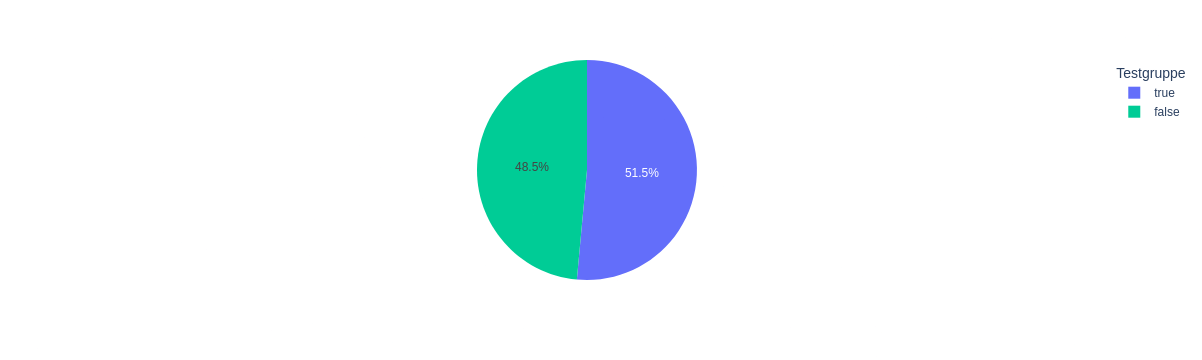

In [27]:
fig = px.pie(test_counts, names="test", values="count", color_discrete_sequence=[test_color_map[0], test_color_map[1]])
fig.update_layout(legend_title="Testgruppe")
save_figure(fig, "groups-pie")
fig.show()

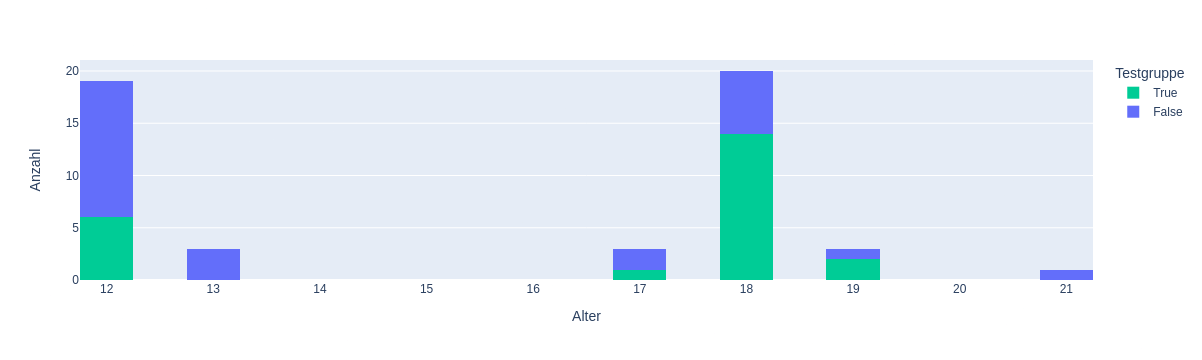

In [28]:
fig = px.histogram(df, x="persoenlich_alter", color="test", nbins=20, color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Alter")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(legend_title="Testgruppe")
save_figure(fig, "groups-bar")
fig.show()

# Tracking-Daten

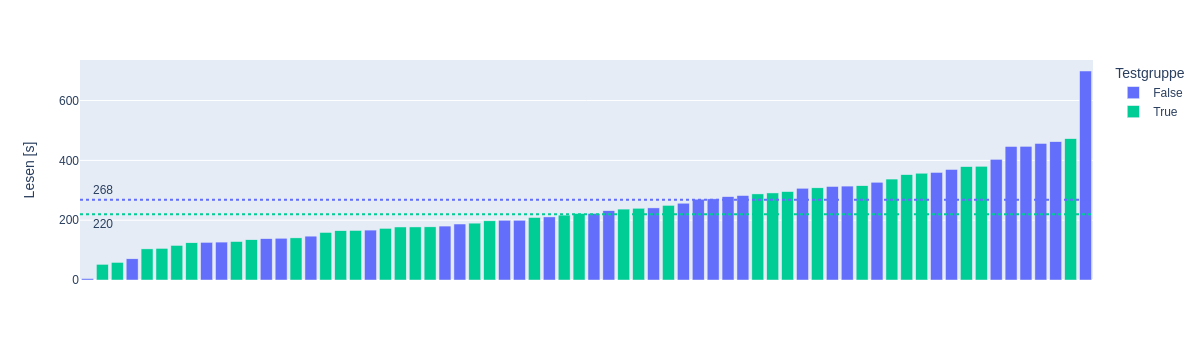

In [29]:
# Säulendiagramm
fig = px.bar(df.sort_values(by=["reading_duration"]), x="id", y="reading_duration", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(showticklabels=False, title_text="")
fig.update_yaxes(title_text="Lesen [s]")
fig.update_coloraxes(colorbar_title="Testgruppe?")
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_title="Testgruppe")

# Liniendiagramme
average_reading_duration = df.groupby('test')['reading_duration'].mean()

fig.add_hline(y=average_reading_duration.loc[False], line_dash="dot", line_color=test_color_map[False], annotation_text=f"   {round(average_reading_duration.loc[False])}", annotation_position="left top")
fig.add_hline(y=average_reading_duration.loc[True], line_dash="dot", line_color=test_color_map[True], annotation_text=f"   {round(average_reading_duration.loc[True])}", annotation_position="left bottom")

save_figure(fig, "reading-bar")
fig.show()

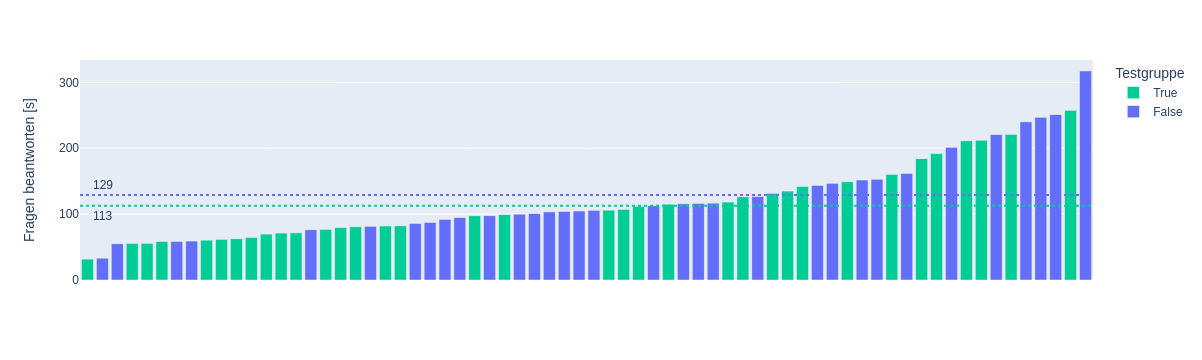

In [30]:
# Säulendiagramm
fig = px.bar(df.sort_values(by=["questions_duration"]), x="id", y="questions_duration", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(showticklabels=False, title_text="")
fig.update_yaxes(title_text="Fragen beantworten [s]")
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_title="Testgruppe")

# Liniendiagramme
average_questions_duration = df.groupby('test')['questions_duration'].mean()

fig.add_hline(y=average_questions_duration.loc[False], line_dash="dot", line_color=test_color_map[False], annotation_text=f"   {round(average_questions_duration.loc[False])}", annotation_position="left top")
fig.add_hline(y=average_questions_duration.loc[True], line_dash="dot", line_color=test_color_map[True], annotation_text=f"   {round(average_questions_duration.loc[True])}", annotation_position="left bottom")

save_figure(fig, "questions-bar")
fig.show()

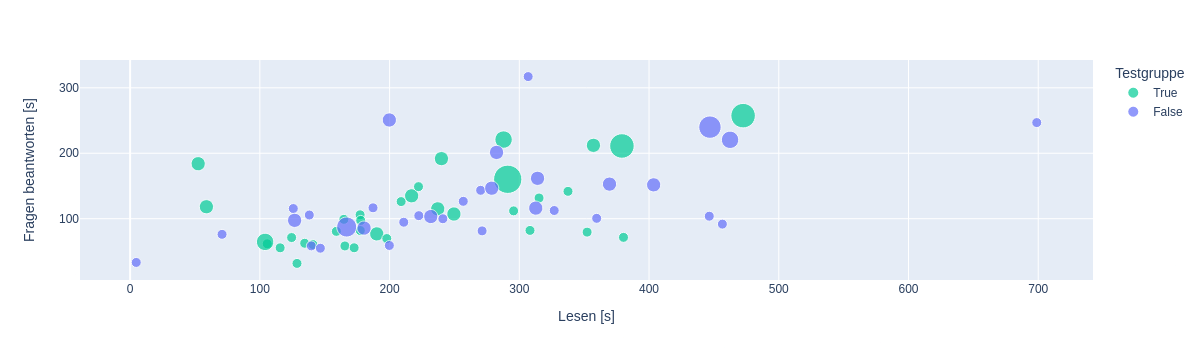

In [31]:
fig = px.scatter(df, x="reading_duration", y="questions_duration", color="test", size="reading_count", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="Fragen beantworten [s]")
fig.update_layout(legend_title="Testgruppe")
save_figure(fig, "reading-questions-scatter")
fig.show()

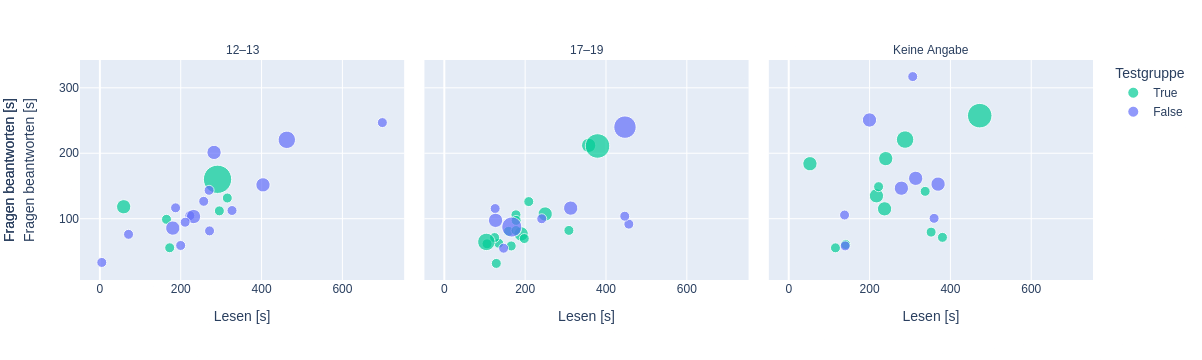

In [32]:
fig = px.scatter(df, x="reading_duration", y="questions_duration", color="test", size="reading_count", color_discrete_map=test_color_map,
                facet_col="altersgruppe", category_orders={"altersgruppe": agegroup_array})
# fig = px.scatter(df.dropna(subset="persoenlich_alter"), x="reading_duration", y="questions_duration", color="test", size="reading_count", color_discrete_map=test_color_map,
#                 facet_col="persoenlich_alter", category_orders={"persoenlich_alter": age_array})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="Fragen beantworten [s]")
fig.update_layout(legend_title="Testgruppe")
save_figure(fig, "reading-questions-scatter-age")
fig.show()

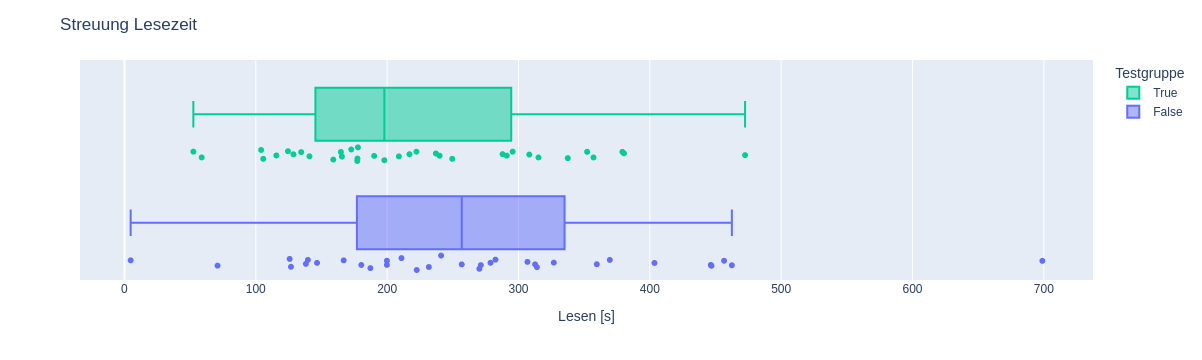

In [33]:
fig = px.box(df, x="reading_duration", points="all",
             y="test", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="", showticklabels=False)
fig.update_layout(legend_title="Testgruppe", title_text="Streuung Lesezeit")
save_figure(fig, "reading-box")
fig.show()

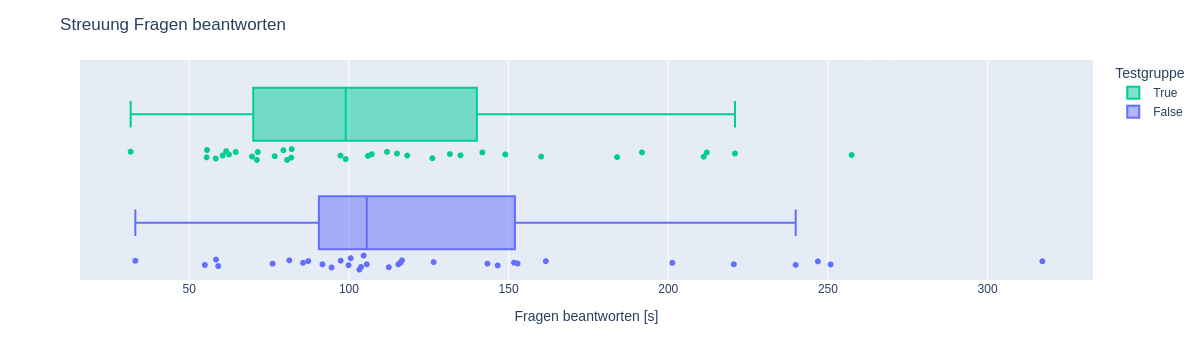

In [34]:
fig = px.box(df, x="questions_duration", points="all",
             y="test", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Fragen beantworten [s]")
fig.update_yaxes(title_text="", showticklabels=False)
fig.update_layout(legend_title="Testgruppe", title_text="Streuung Fragen beantworten")
save_figure(fig, "questions-box")
fig.show()

# Antworten

In [35]:
answers = [1, 0, 2, 1, 0]

In [36]:
question_cols = df.columns[3:8]

In [37]:
def count_correct_answers(row):
    count = 0
    for i, col in enumerate(question_cols):
        if row[col] == answers[i]:
            count += 1
    return count

In [38]:
df["correct_answers"] = df.apply(count_correct_answers, axis=1)

In [39]:
rows = []
for i, col in enumerate(question_cols):
    question = " ".join(col.split('_')[1:])
    correct = (df[col] == answers[i]).sum()
    wrong = (df[col] != answers[i]).sum()

    rows.append([question, correct, wrong])

questions_df = pd.DataFrame(rows, columns=['Frage', 'Richtig', 'Falsch'])
questions_df

Frage  Richtig  Falsch
0           gefuehle beruf       57      11
1             warum lehrer       58      10
2  oeffentlichkeit meinung       26      42
3           vorwurf eltern       41      27
4                 internet       44      24

## Zeit

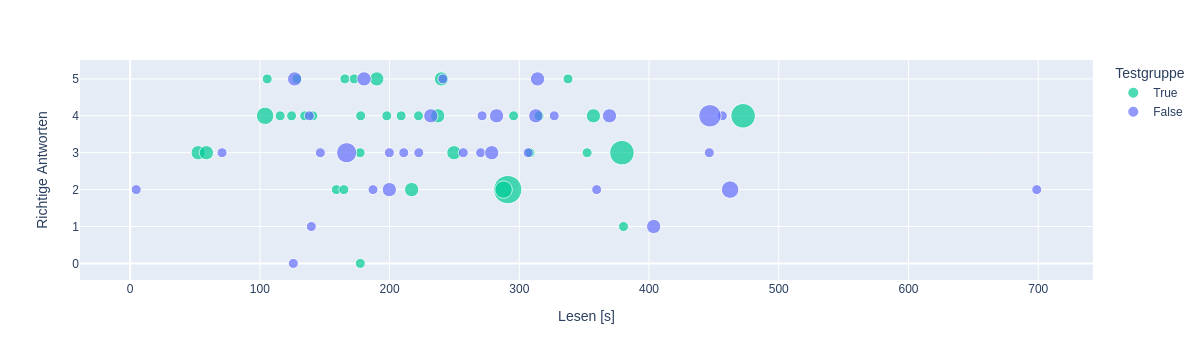

In [40]:
fig = px.scatter(df, x="reading_duration", y="correct_answers", size="reading_count", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="Richtige Antworten")
fig.update_layout(legend_title="Testgruppe")
save_figure(fig, "reading-correct-scatter")
fig.show()

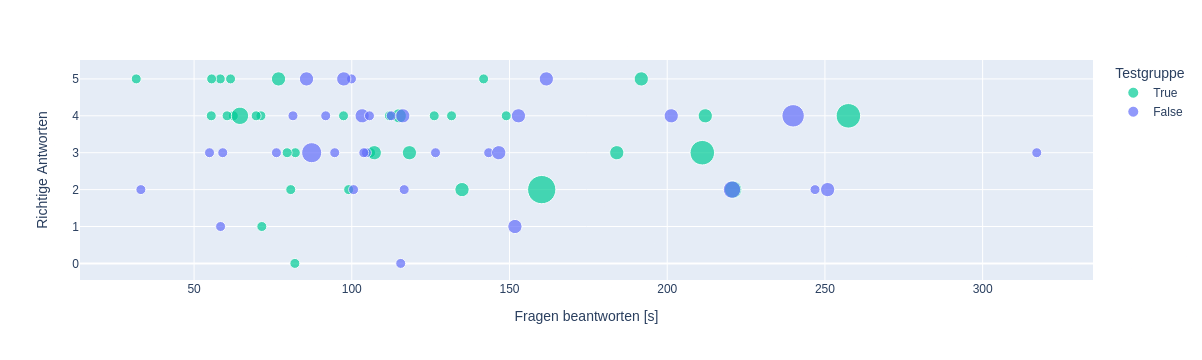

In [41]:
fig = px.scatter(df, x="questions_duration", y="correct_answers", size="reading_count", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Fragen beantworten [s]")
fig.update_yaxes(title_text="Richtige Antworten")
fig.update_layout(legend_title="Testgruppe")
save_figure(fig, "questions-correct-scatter")
fig.show()

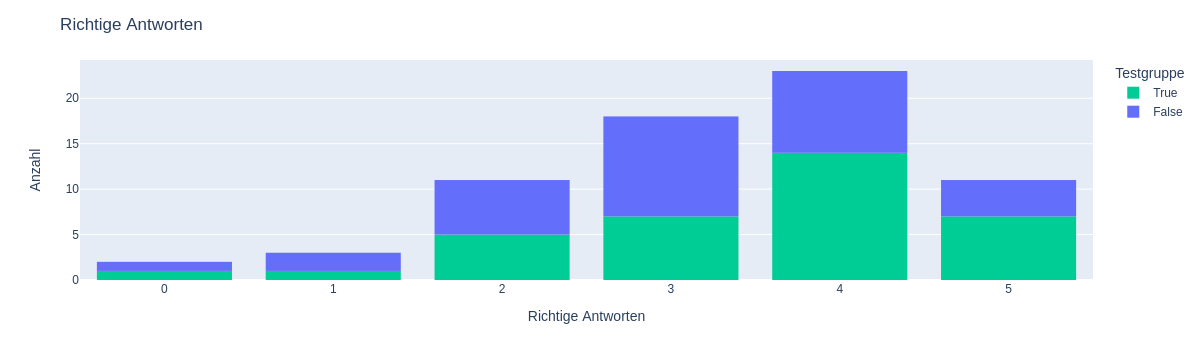

In [42]:
fig = px.histogram(df, x="correct_answers", color="test", color_discrete_map=test_color_map,
                  category_orders={"altersgruppe": agegroup_array, "correct_answers": list(range(0,6))})
# fig = px.histogram(df.dropna(subset="persoenlich_alter"), x="correct_answers", color="test", color_discrete_map=test_color_map,
#                   facet_col="persoenlich_alter", category_orders={"persoenlich_alter": age_array, "correct_answers": list(range(0,6))})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Richtige Antworten", type="category", categoryarray=list(range(0,6)))
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Richtige Antworten", legend_title="Testgruppe")
save_figure(fig, "correct-absolute-bar-age")
fig.show()

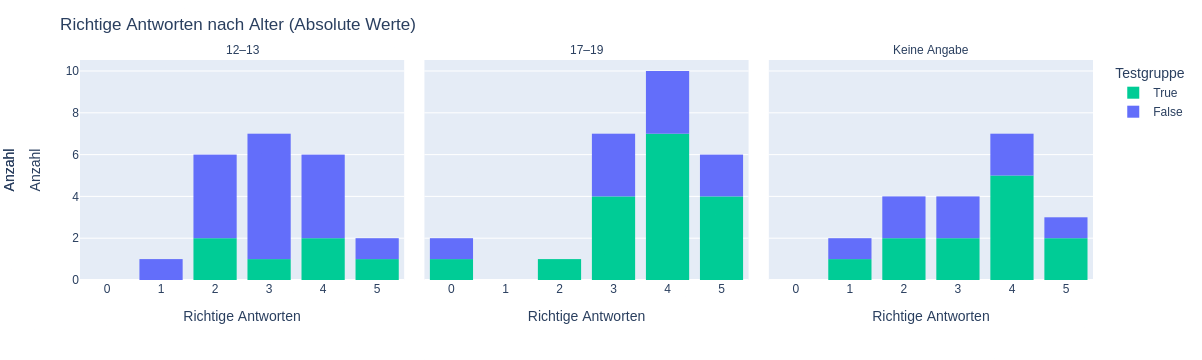

In [43]:
fig = px.histogram(df, x="correct_answers", color="test", color_discrete_map=test_color_map,
                  facet_col="altersgruppe", category_orders={"altersgruppe": agegroup_array, "correct_answers": list(range(0,6))})
# fig = px.histogram(df.dropna(subset="persoenlich_alter"), x="correct_answers", color="test", color_discrete_map=test_color_map,
#                   facet_col="persoenlich_alter", category_orders={"persoenlich_alter": age_array, "correct_answers": list(range(0,6))})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Richtige Antworten", type="category", categoryarray=list(range(0,6)))
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Richtige Antworten nach Alter (Absolute Werte)", legend_title="Testgruppe")
save_figure(fig, "correct-absolute-bar-age")
fig.show()

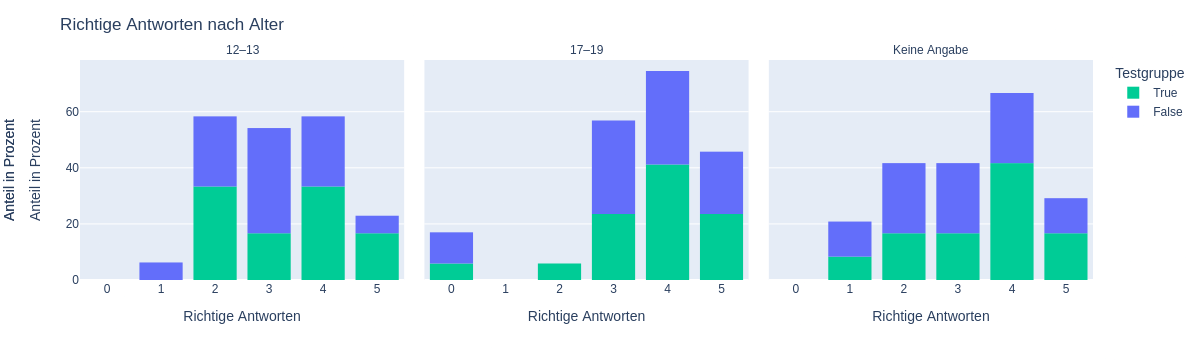

In [44]:
fig = px.histogram(df, x="correct_answers", color="test", color_discrete_map=test_color_map, histnorm="percent",
                  facet_col="altersgruppe", category_orders={"altersgruppe": agegroup_array, "correct_answers": list(range(0,6))})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Richtige Antworten", type="category", categoryarray=list(range(0,6)))
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Richtige Antworten nach Alter", legend_title="Testgruppe")
save_figure(fig, "correct-percent-bar-age")
fig.show()

# Testgruppe

## Selbsteinschätzung

In [45]:
df_bionic = df[df["test"]]
df_bionic

id                       fingerprint  \
0   3cc07733-3742-4090-994a-a5871016ebcc  d416268a243114c1742cc14e71814ade   
2   e43c464c-543d-4a31-bbc7-ddc59c97f4d6  f5129980f00eff8b06c6d9dc53152514   
3   731e6143-04f3-4fff-a904-b86052d8686d  c1ed69d201693ed73e4c6c85f52e6a5c   
5   1c20b10b-7b40-4f72-ad62-d0f82dffe16c  3f9e59cdd2fbc071de73b4cf87d21eb8   
6   9060e823-c05e-41ae-9c36-10c77e389be7  5eeefb9a8a6e1cc2490146ff16de1554   
7   6f44d6e8-3d8c-46fe-9ae3-db136e738aa5  3cfda0b0235d557b05b61b4a0fe4ca11   
8   3651a083-9dcc-49c2-83cf-81acf3b1f341  f79b85c7a0210d2d1efc4221c5e5c838   
9   73d5094f-108e-42db-a59d-5c0680877022  75a10532feed40e3a1aa444248adaa51   
10  1659469c-274e-42dc-84ed-3fb106cf13f7  d5229fdaad2081e2fdfd56c833f6e8e7   
11  db23556e-094d-49ac-89cf-bd4ddc1aebf9  a3703fa3f5d0f37e75ecf2123b5e2b72   
12  4d6bdb47-8285-476b-9cae-8eee4f9e5c94  807b3621e6f42589116d189a8af86b33   
13  10a9190e-2a3f-410e-aff2-553c81c80913  807b3621e6f42589116d189a8af86b33   
14  5dd0d672-69a3-41bc-bfef-840b3c513016  78d83afe7a8e89ad7f7840427de042a6   
15  dfca9133-21d8-4daf-950f-31f77d2c2ad2  f8906b4993b63c4156aaf25f15741a8a   
16  81ea222c-4e1d-47eb-b971-8aceaf599489  1d019461d36ff16ed410957938e1828c   
17  480acfe7-3450-4da8-98e3-84ebaa77c4c9  722b8c7bea5c38c3c3e1333e1788d84e   
18  acec8ac2-1e41-4551-a7d5-15b566182e64  b8e5e010a46c8e7e722ec87c63c9e0cb   
19  dc56e49b-28e4-4a26-a65a-9942f7f6e923  567d5ff7f21b2e2e0446c1a2c47d56db   
20  c91494aa-e56c-4e64-8fcc-ce73766d5428  fa80ed653401f79e392c652f96f040f7   
21  a175af25-b143-4270-9fd9-02ceb250be4b  b8e5e010a46c8e7e722ec87c63c9e0cb   
22  c0894f46-e678-4e84-b56a-b804dbb4092a  adbcf03634ee2639e0835eda9e2a55e0   
23  a536944f-409e-409b-97ca-cafcfd63920c  b8e5e010a46c8e7e722ec87c63c9e0cb   
24  4836bfcb-1919-4f3c-8bf0-a41d2f8cae83  4a76c5ed36223ba3e502495ad484a427   
25  117db95b-2137-47ea-bb5b-624dce5ab75c  b8e5e010a46c8e7e722ec87c63c9e0cb   
26  ca04ed91-caf9-47b7-89e3-c9591558a253  567d5ff7f21b2e2e0446c1a2c47d56db   
27  806328cb-9ae6-40d2-9583-9beb5e39c376  fee6d4e6a610cfcbc9051b428ad19e79   
30  3a6de92b-d5ad-40d0-a13a-3138415bcbc1  74f83fe9fa01af473fd93a52407a5be9   
31  f72b2675-4638-41cb-9135-72dffed5387a  bf079ec88d743f3397972fadb2a6a6fa   
32  1f123f6a-8c73-40ae-9e7d-d556dfd8c620  f0b4039bb809778beafe7fda13a257a9   
33  8ceae0e9-ad66-44e0-ab16-1d7f35ff1702  a10be21f2d26e6e90d46df0a245a241b   
34  a2a2caa2-3906-4322-bb76-aeda44bf9893  988d4ab29d125ea972485052f548e515   
35  99728da4-0a57-41b5-be84-bdf7dce9395b  cbc4541a14c6c997049b742d7f109808   
36  57b155b0-947c-40bb-b0a9-5b6b3232443e  09c88da8acaf43f9ca107e93c9e059bd   
37  876e6a2c-bafe-4806-8966-443da414936e  c85d16a036429d8174811e5c2bf0753e   
38  24a17954-b0fa-4ef3-866b-33a5086b68e0  ceb8c55503b3401d0ced4f03d9dadb58   

    test  fragen_gefuehle_beruf  fragen_warum_lehrer  \
0   True                    1.0                  0.0   
2   True                    1.0                  2.0   
3   True                    2.0                  0.0   
5   True                    1.0                  0.0   
6   True                    2.0                  0.0   
7   True                    1.0                  0.0   
8   True                    1.0                  0.0   
9   True                    1.0                  0.0   
10  True                    1.0                  0.0   
11  True                    1.0                  0.0   
12  True                    1.0                  0.0   
13  True                    2.0                  1.0   
14  True                    1.0                  0.0   
15  True                    1.0                  0.0   
16  True                    1.0                  0.0   
17  True                    1.0                  0.0   
18  True                    1.0                  0.0   
19  True                    1.0                  3.0   
20  True                    1.0                  0.0   
21  True                    1.0                  0.0   
22  True                    1.0                  0.0 

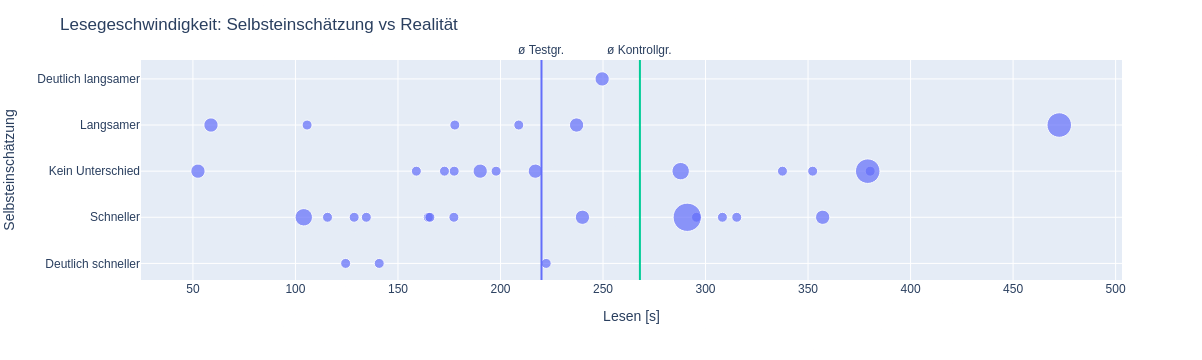

In [46]:
fig = px.scatter(df_bionic, x="reading_duration", y="bionic_schneller", size="reading_count")
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="Selbsteinschätzung", categoryarray=bionic_schneller_labels)
fig.update_layout(title_text="Lesegeschwindigkeit: Selbsteinschätzung vs Realität")

# Durchschnitt
fig.add_vline(x=round(average_reading_duration.loc[True]), line_color=test_color_map[False], annotation_text="ø Testgr.", annotation_position="top")
fig.add_vline(x=round(average_reading_duration.loc[False]), line_color=test_color_map[True], annotation_text="ø Kontrollgr.", annotation_position="top")

save_figure(fig, "self-report-vs-reality-reading-scatter")
fig.show()

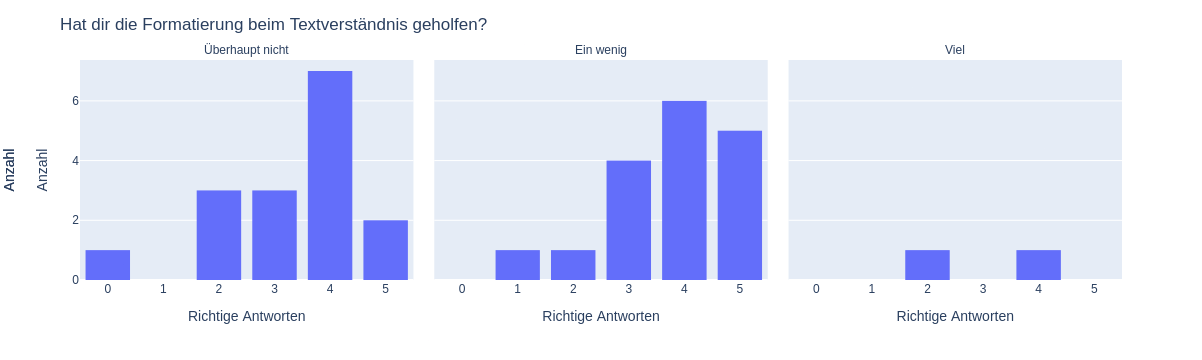

In [47]:
fig = px.histogram(df_bionic, x="correct_answers", facet_col="bionic_textverstaendnis")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(title_text="Richtige Antworten", type="category", categoryarray=list(range(0,6)))
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Hat dir die Formatierung beim Textverständnis geholfen?")
save_figure(fig, "correct-absolute-bar-comprehension")
fig.show()

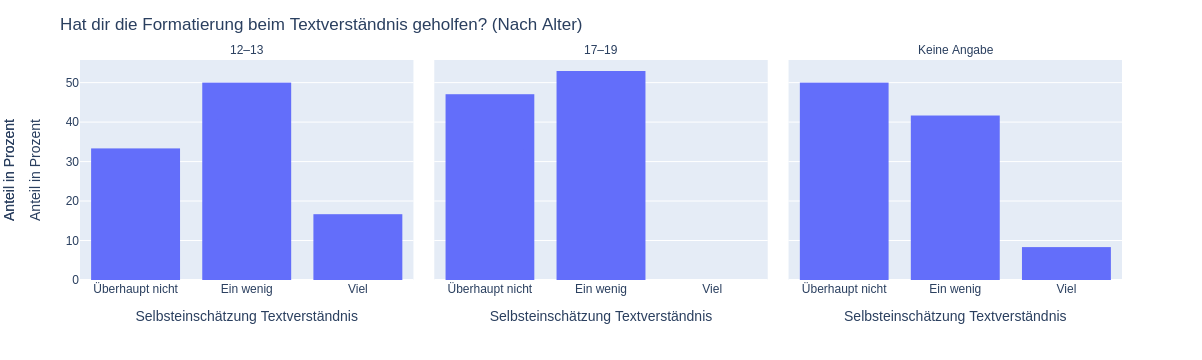

In [48]:
fig = px.histogram(df_bionic, x="bionic_textverstaendnis", facet_col="altersgruppe",
                   histnorm="percent", category_orders={"altersgruppe": agegroup_array})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Selbsteinschätzung Textverständnis", categoryarray=bionic_textverstaendnis_labels)
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Hat dir die Formatierung beim Textverständnis geholfen? (Nach Alter)")
save_figure(fig, "comprehension-percent-bar-age")
fig.show()

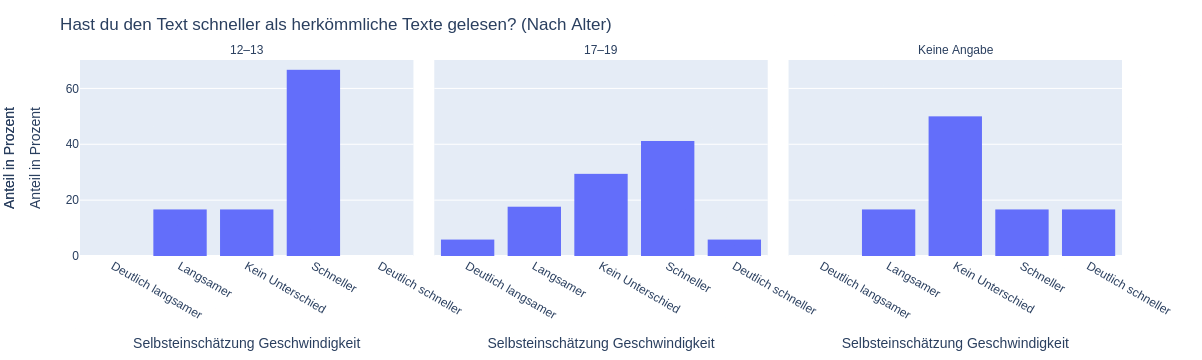

In [49]:
fig = px.histogram(df_bionic, x="bionic_schneller", facet_col="altersgruppe",
                   histnorm="percent", category_orders={"altersgruppe": agegroup_array})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Selbsteinschätzung Geschwindigkeit", categoryarray=bionic_schneller_labels[::-1])
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Hast du den Text schneller als herkömmliche Texte gelesen? (Nach Alter)")
save_figure(fig, "faster-percent-bar-age")
fig.show()

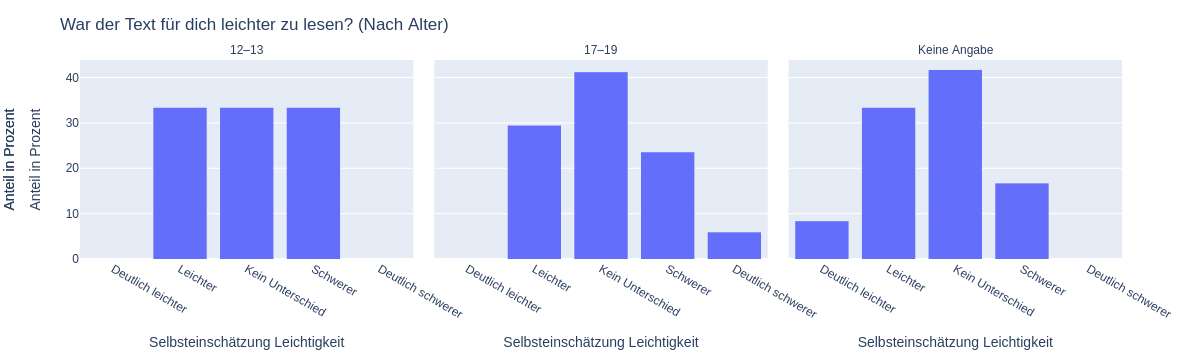

In [50]:
fig = px.histogram(df_bionic, x="bionic_leichter", facet_col="altersgruppe",
                   histnorm="percent", category_orders={"altersgruppe": agegroup_array})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Selbsteinschätzung Leichtigkeit", categoryarray=bionic_leichter_labels)
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="War der Text für dich leichter zu lesen? (Nach Alter)")
save_figure(fig, "easier-percent-bar-age")
fig.show()

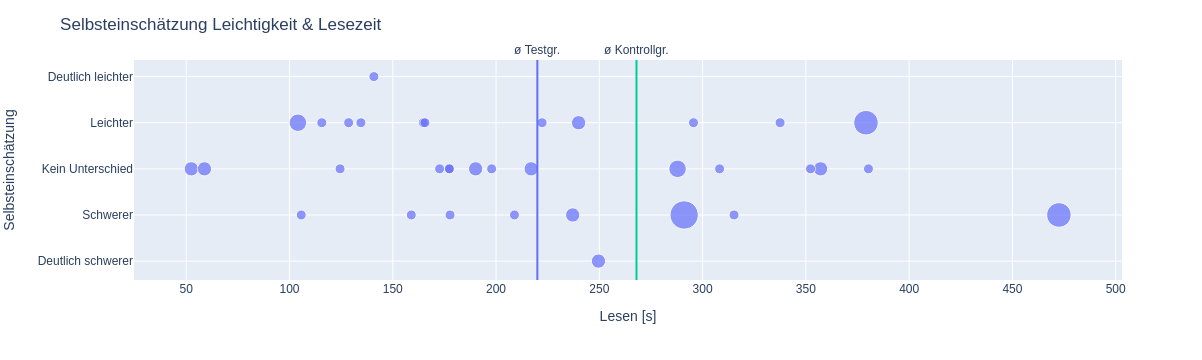

In [51]:
fig = px.scatter(df_bionic, y="bionic_leichter", x="reading_duration", size="reading_count")
fig.update_yaxes(title_text="Selbsteinschätzung", categoryarray=bionic_leichter_labels[::-1])
fig.update_xaxes(title_text="Lesen [s]")
fig.update_layout(title_text="Selbsteinschätzung Leichtigkeit & Lesezeit")

# Durchschnitt
fig.add_vline(x=round(average_reading_duration.loc[True]), line_color=test_color_map[False], annotation_text="ø Testgr.", annotation_position="top")
fig.add_vline(x=round(average_reading_duration.loc[False]), line_color=test_color_map[True], annotation_text="ø Kontrollgr.", annotation_position="top")

save_figure(fig, "reading-easier-scatter")
fig.show()

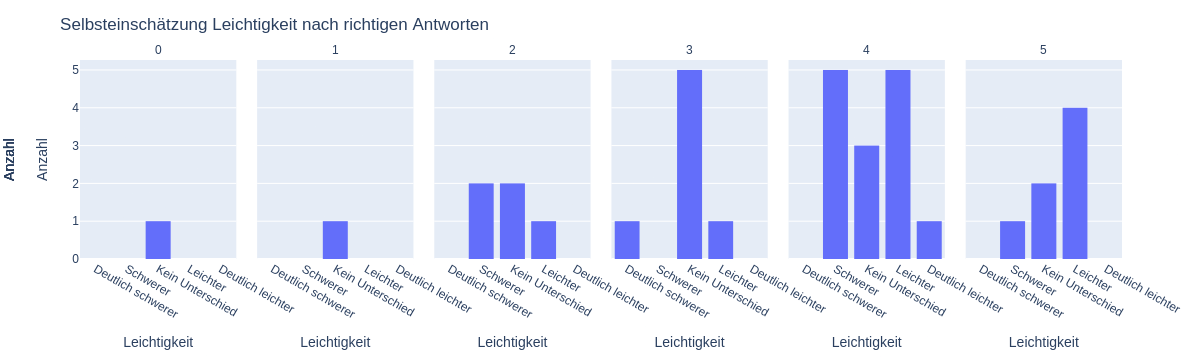

In [52]:
fig = px.histogram(df_bionic, x="bionic_leichter", facet_col="correct_answers", #facet_col_wrap=3,
                   category_orders={"bionic_leichter": bionic_leichter_labels[::-1], "correct_answers": list(range(0,6))})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Leichtigkeit")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Selbsteinschätzung Leichtigkeit nach richtigen Antworten")
save_figure(fig, "easier-absolute-bar-correct")
fig.show()

## Bionic Fragebogen

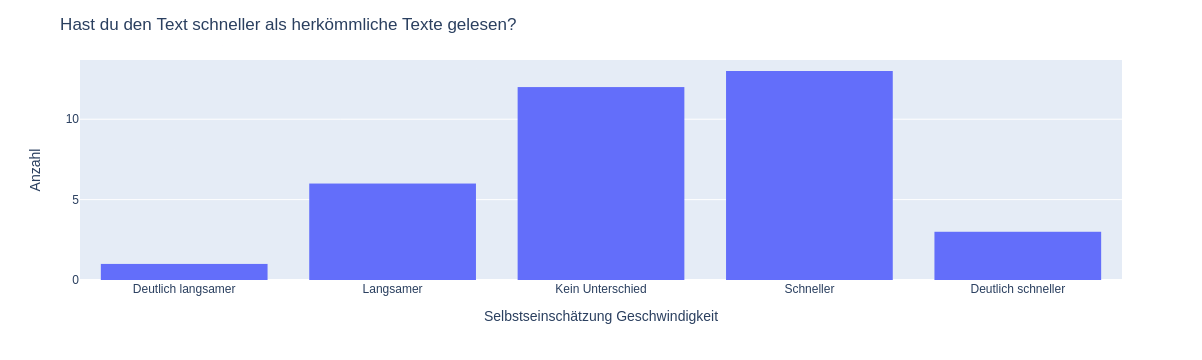

In [53]:
fig = px.histogram(df_bionic, x="bionic_schneller", category_orders={"bionic_schneller": bionic_schneller_labels[::-1]})
fig.update_xaxes(title_text="Selbstseinschätzung Geschwindigkeit")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Hast du den Text schneller als herkömmliche Texte gelesen?")
save_figure(fig, "self-report-faster-bar")
fig.show()

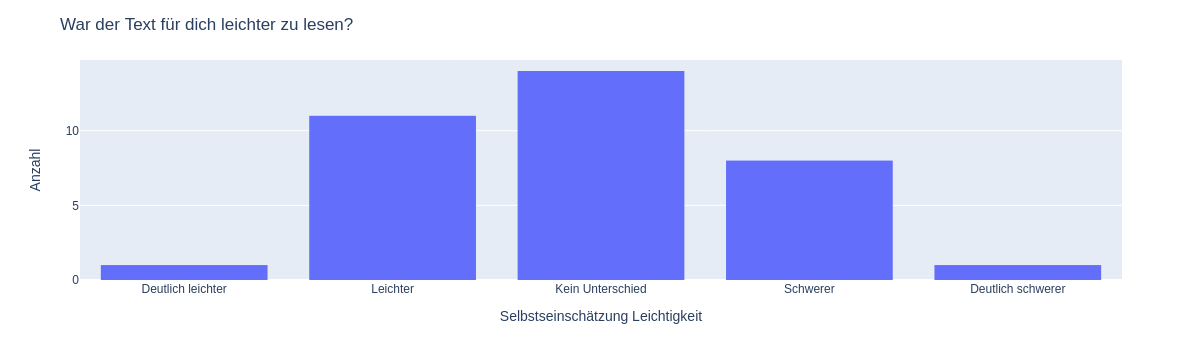

In [54]:
fig = px.histogram(df_bionic, x="bionic_leichter", category_orders={"bionic_leichter": bionic_leichter_labels})
fig.update_xaxes(title_text="Selbstseinschätzung Leichtigkeit")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="War der Text für dich leichter zu lesen?")
save_figure(fig, "self-report-easier-bar")
fig.show()

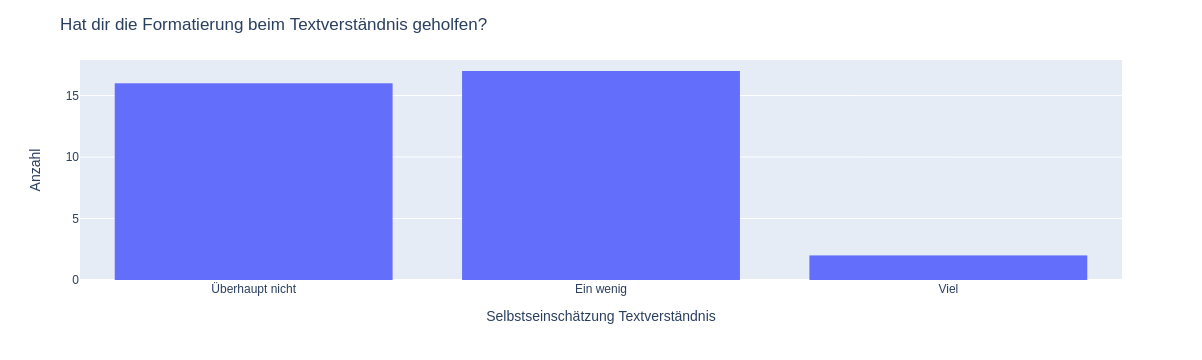

In [55]:
fig = px.histogram(df_bionic, x="bionic_textverstaendnis", category_orders={"bionic_textverstaendnis": bionic_textverstaendnis_labels})
fig.update_xaxes(title_text="Selbstseinschätzung Textverständnis")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Hat dir die Formatierung beim Textverständnis geholfen?")
save_figure(fig, "self-report-comprehension-bar")
fig.show()

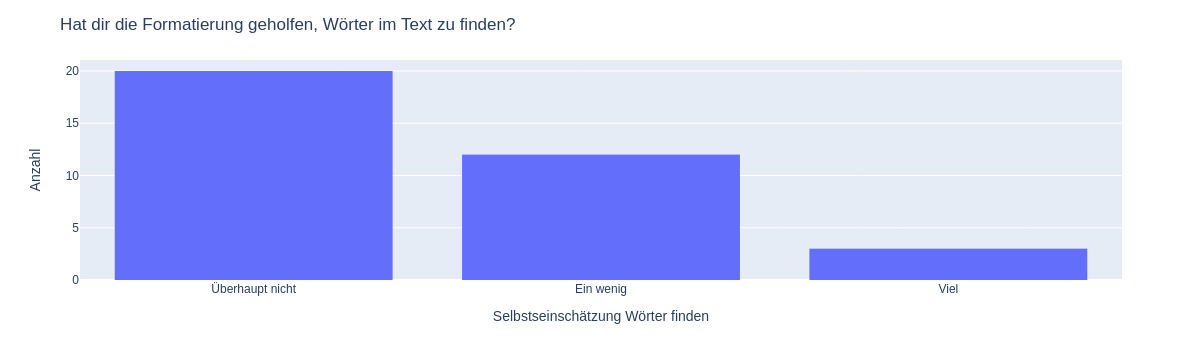

In [56]:
fig = px.histogram(df_bionic, x="bionic_woerter_finden", category_orders={"bionic_woerter_finden": bionic_woerter_finden_labels})
fig.update_xaxes(title_text="Selbstseinschätzung Wörter finden")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Hat dir die Formatierung geholfen, Wörter im Text zu finden?")
save_figure(fig, "self-report-search-bar")
fig.show()

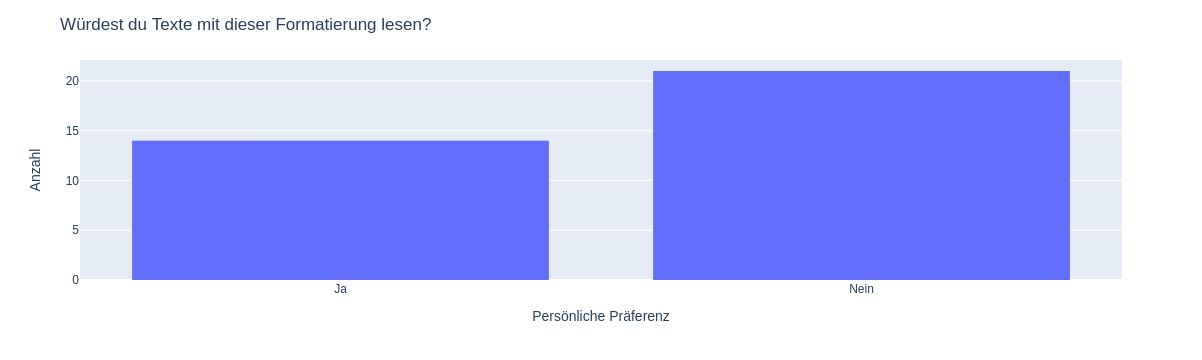

In [57]:
fig = px.histogram(df_bionic, x="bionic_mehr_texte", category_orders={"bionic_mehr_texte": bionic_mehr_texte_labels})
fig.update_xaxes(title_text="Persönliche Präferenz")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Würdest du Texte mit dieser Formatierung lesen?")
save_figure(fig, "self-report-more-bar")
fig.show()

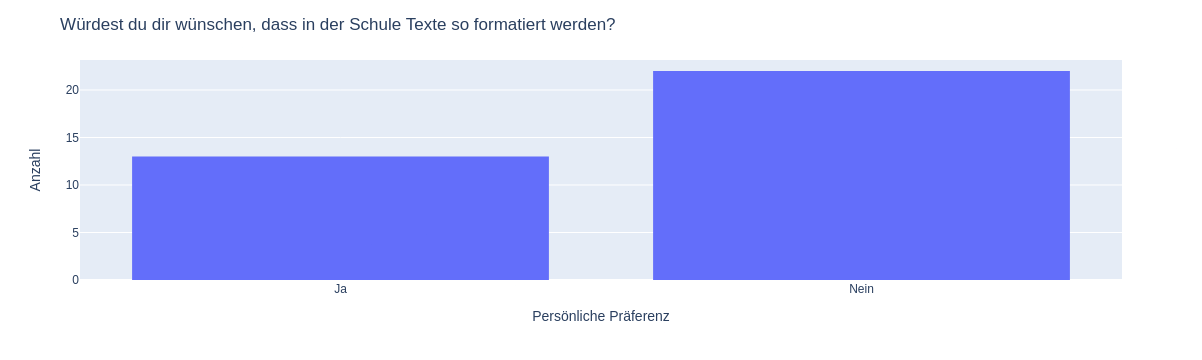

In [58]:
fig = px.histogram(df_bionic, x="bionic_in_schule", category_orders={"bionic_in_schule": bionic_in_schule_labels})
fig.update_xaxes(title_text="Persönliche Präferenz")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Würdest du dir wünschen, dass in der Schule Texte so formatiert werden?")
save_figure(fig, "self-report-school-bar")
fig.show()

# Persönliche Fragen

## Nach Alter

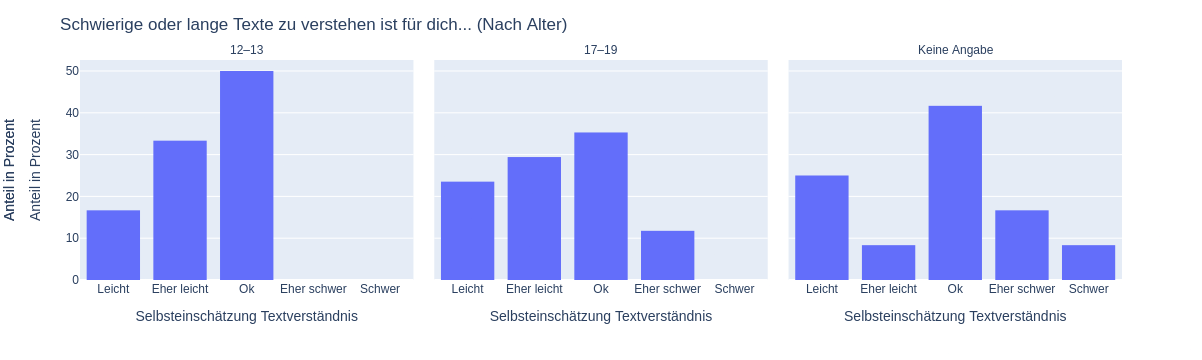

In [59]:
fig = px.histogram(df_bionic, x="persoenlich_textverstaendnis", facet_col="altersgruppe",
                   histnorm="percent", category_orders={"altersgruppe": agegroup_array})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Selbsteinschätzung Textverständnis", categoryarray=persoenlich_textverstaendnis_labels)
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Schwierige oder lange Texte zu verstehen ist für dich... (Nach Alter)")
save_figure(fig, "personal-comprehension-percent-bar-age")
fig.show()

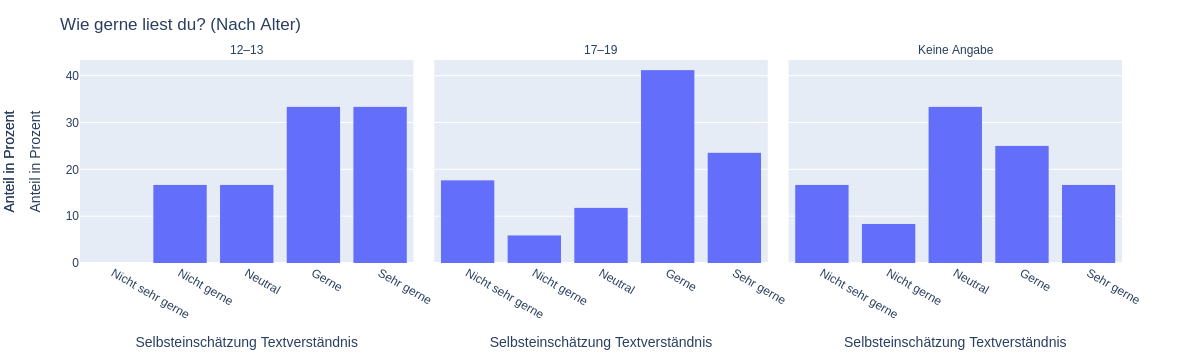

In [60]:
fig = px.histogram(df_bionic, x="persoenlich_freude_lesen", facet_col="altersgruppe",
                   histnorm="percent", category_orders={"altersgruppe": agegroup_array})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Selbsteinschätzung Textverständnis", categoryarray=persoenlich_freude_lesen_labels)
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Wie gerne liest du? (Nach Alter)")
save_figure(fig, "personal-joy-percent-bar-age")
fig.show()

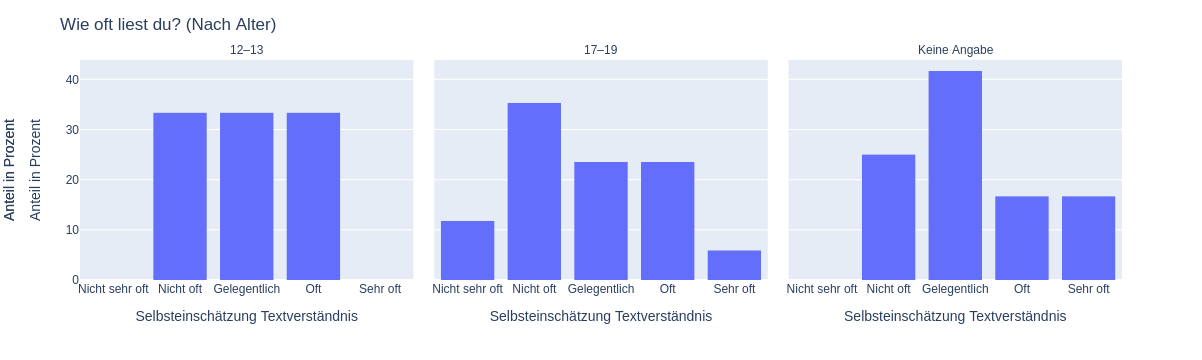

In [61]:
fig = px.histogram(df_bionic, x="persoenlich_haeufigkeit_lesen", facet_col="altersgruppe",
                   histnorm="percent", category_orders={"altersgruppe": agegroup_array})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Selbsteinschätzung Textverständnis", categoryarray=persoenlich_haeufigkeit_lesen_labels)
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Wie oft liest du? (Nach Alter)")
save_figure(fig, "personal-frequency-percent-bar-age")
fig.show()

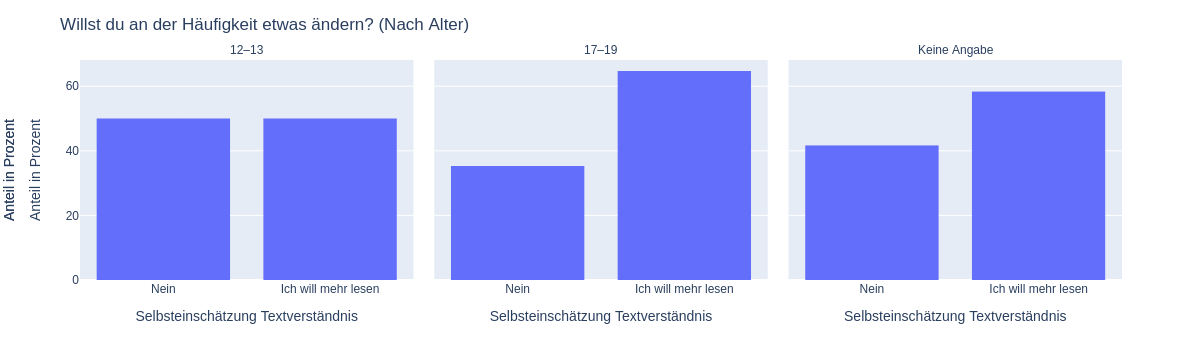

In [62]:
fig = px.histogram(df_bionic, x="persoenlich_ziel_lesen", facet_col="altersgruppe",
                   histnorm="percent", category_orders={"altersgruppe": agegroup_array})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Selbsteinschätzung Textverständnis", categoryarray=persoenlich_ziel_lesen_labels)
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Willst du an der Häufigkeit etwas ändern? (Nach Alter)")
save_figure(fig, "personal-change-frequency-percent-bar-age")
fig.show()

## Einfluss

### Lesen

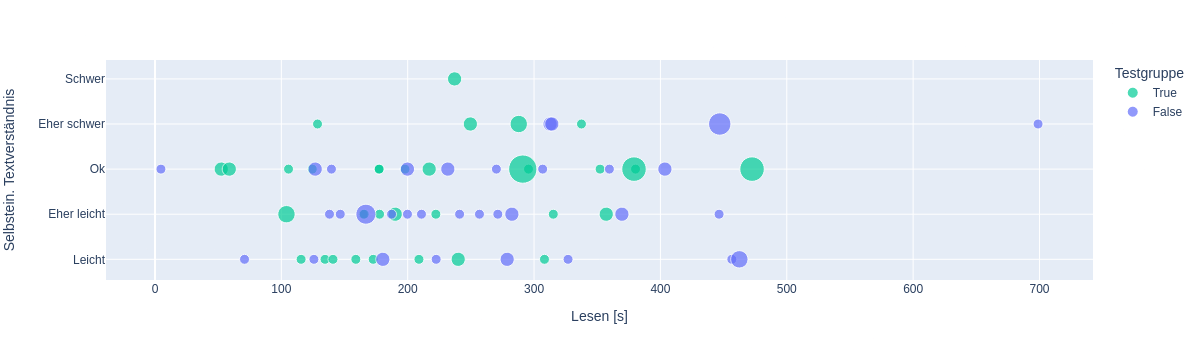

In [63]:
fig = px.scatter(df, x="reading_duration", y="persoenlich_textverstaendnis", size="reading_count", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="Selbstein. Textverständnis", categoryarray=persoenlich_textverstaendnis_labels)
fig.update_layout(legend_title="Testgruppe")
save_figure(fig, "reading-personal_comprehension-scatter")
fig.show()

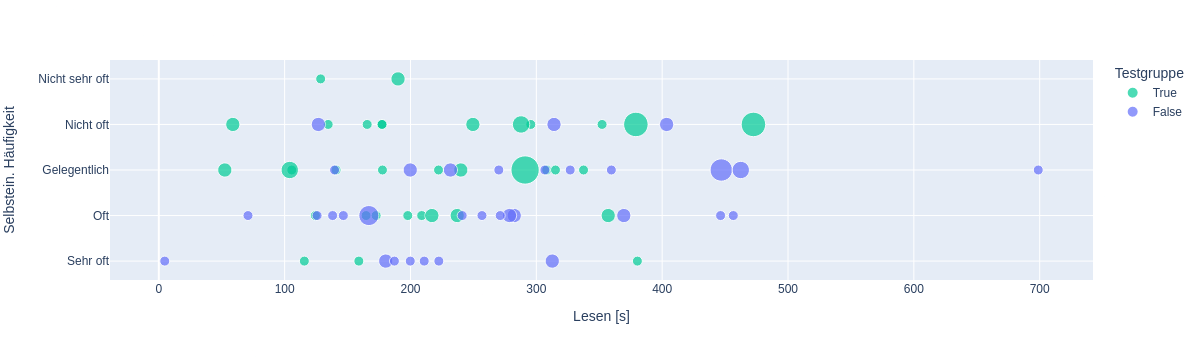

In [64]:
fig = px.scatter(df, x="reading_duration", y="persoenlich_haeufigkeit_lesen", size="reading_count", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="Selbstein. Häufigkeit", categoryarray=persoenlich_haeufigkeit_lesen_labels[::-1])
fig.update_layout(legend_title="Testgruppe")
save_figure(fig, "reading-personal_frequency-scatter")
fig.show()

### Antworten

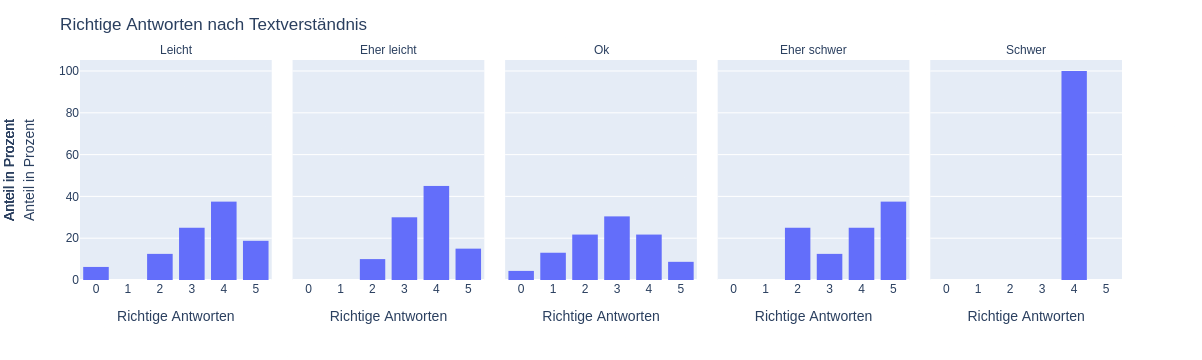

In [65]:
fig = px.histogram(df, x="correct_answers", histnorm="percent",
                  facet_col="persoenlich_textverstaendnis", category_orders={
                      "persoenlich_textverstaendnis": persoenlich_textverstaendnis_labels, "correct_answers": list(range(0,6))})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Richtige Antworten", type="category", categoryarray=list(range(0,6)))
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Richtige Antworten nach Textverständnis", legend_title="Testgruppe")
save_figure(fig, "correct-percent-bar-personal_comprehension")
fig.show()

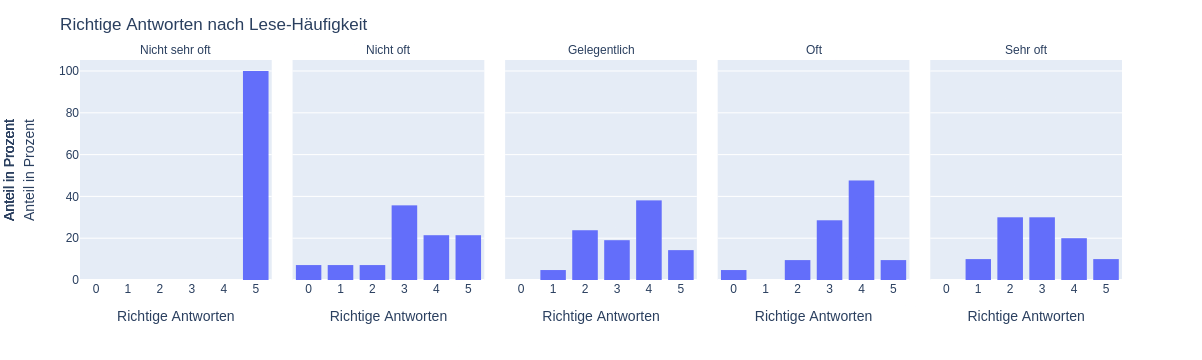

In [66]:
fig = px.histogram(df, x="correct_answers", histnorm="percent",
                  facet_col="persoenlich_haeufigkeit_lesen", category_orders={
                      "persoenlich_haeufigkeit_lesen": persoenlich_haeufigkeit_lesen_labels, "correct_answers": list(range(0,6))})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Richtige Antworten", type="category", categoryarray=list(range(0,6)))
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Richtige Antworten nach Lese-Häufigkeit", legend_title="Testgruppe")
save_figure(fig, "correct-percent-bar-personal_frequency")
fig.show()

### Bionic

#### Textverständnis

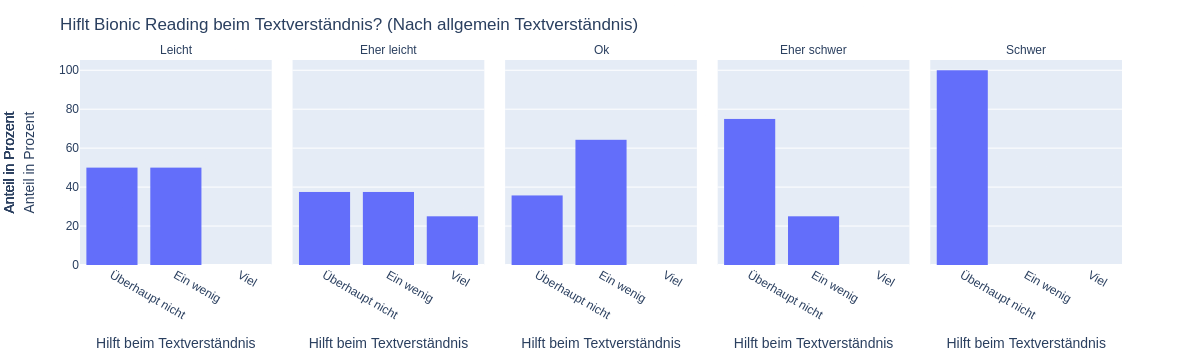

In [67]:
fig = px.histogram(df_bionic, x="bionic_textverstaendnis", histnorm="percent", facet_col="persoenlich_textverstaendnis", category_orders={
                      "persoenlich_textverstaendnis": persoenlich_textverstaendnis_labels,
                      "bionic_textverstaendnis": bionic_textverstaendnis_labels})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Hilft beim Textverständnis")
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Hiflt Bionic Reading beim Textverständnis? (Nach allgemein Textverständnis)", legend_title="Testgruppe")
save_figure(fig, "comprehension-percent-bar-personal_comprehension")
fig.show()

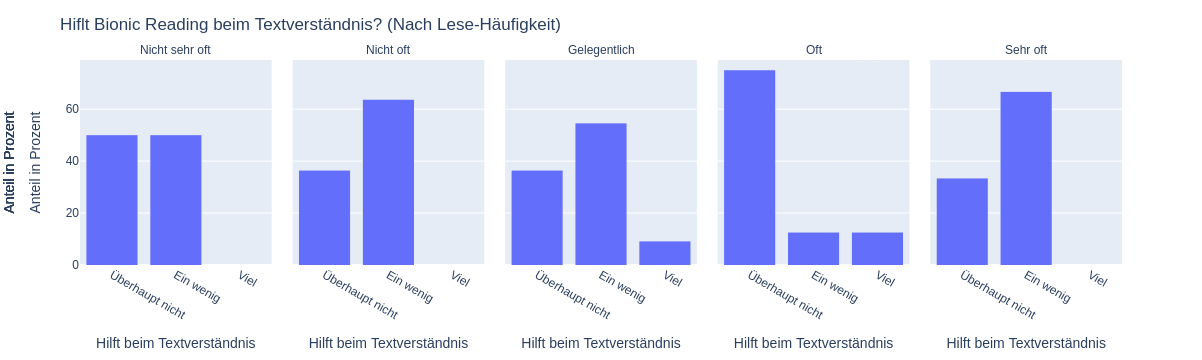

In [68]:
fig = px.histogram(df_bionic, x="bionic_textverstaendnis", histnorm="percent", facet_col="persoenlich_haeufigkeit_lesen", category_orders={
                      "persoenlich_haeufigkeit_lesen": persoenlich_haeufigkeit_lesen_labels,
                      "bionic_textverstaendnis": bionic_textverstaendnis_labels})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Hilft beim Textverständnis")
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Hiflt Bionic Reading beim Textverständnis? (Nach Lese-Häufigkeit)", legend_title="Testgruppe")
save_figure(fig, "comprehension-percent-bar-personal_frequency")
fig.show()

#### Leichter

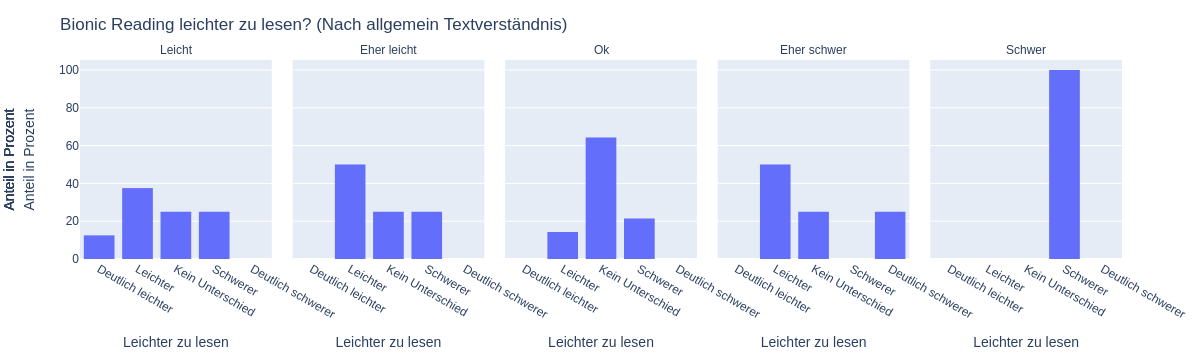

In [69]:
fig = px.histogram(df_bionic, x="bionic_leichter", histnorm="percent",
                  facet_col="persoenlich_textverstaendnis", category_orders={
                      "persoenlich_textverstaendnis": persoenlich_textverstaendnis_labels, 
                      "bionic_leichter": bionic_leichter_labels})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Leichter zu lesen")
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Bionic Reading leichter zu lesen? (Nach allgemein Textverständnis)", legend_title="Testgruppe")
save_figure(fig, "easier-percent-bar-personal_comprehension")
fig.show()

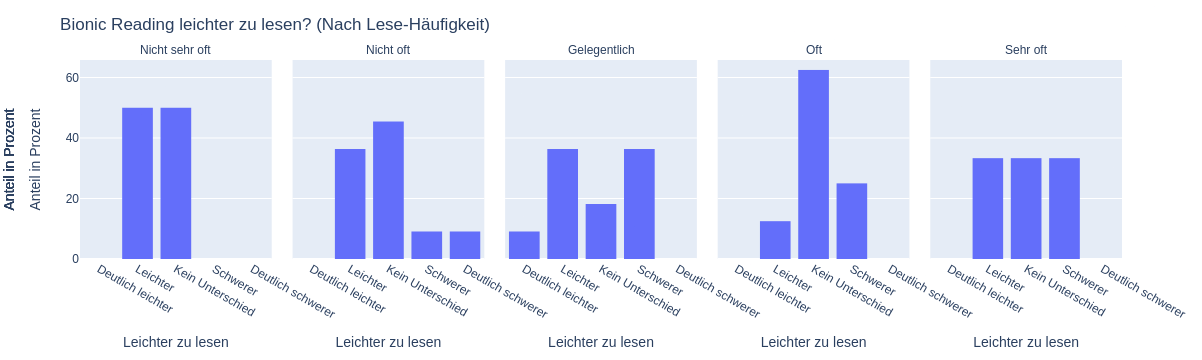

In [70]:
fig = px.histogram(df_bionic, x="bionic_leichter", histnorm="percent",
                  facet_col="persoenlich_haeufigkeit_lesen", category_orders={
                      "persoenlich_haeufigkeit_lesen": persoenlich_haeufigkeit_lesen_labels,
                      "bionic_leichter": bionic_leichter_labels})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Leichter zu lesen")
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Bionic Reading leichter zu lesen? (Nach Lese-Häufigkeit)", legend_title="Testgruppe")
save_figure(fig, "easier-percent-bar-personal_frequency")
fig.show()

#### Persönliche Präferenz

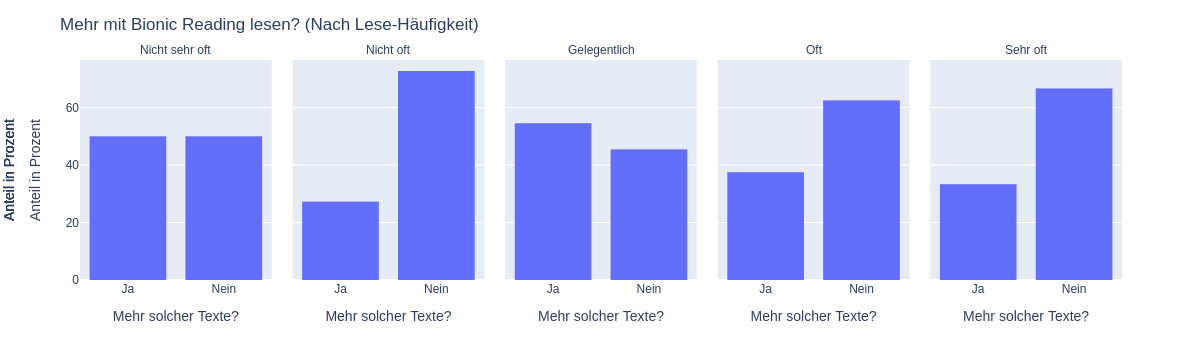

In [71]:
fig = px.histogram(df_bionic, x="bionic_mehr_texte", histnorm="percent",
                  facet_col="persoenlich_haeufigkeit_lesen", category_orders={
                      "persoenlich_haeufigkeit_lesen": persoenlich_haeufigkeit_lesen_labels,
                      "bionic_mehr_texte": bionic_mehr_texte_labels})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Mehr solcher Texte?")
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Mehr mit Bionic Reading lesen? (Nach Lese-Häufigkeit)", legend_title="Testgruppe")
save_figure(fig, "more-percent-bar-personal_frequency")
fig.show()

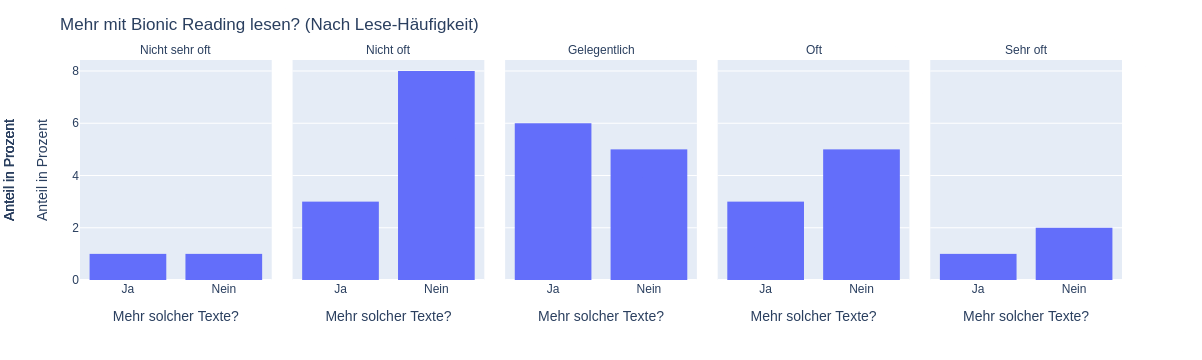

In [72]:
fig = px.histogram(df_bionic, x="bionic_mehr_texte",
                  facet_col="persoenlich_haeufigkeit_lesen", category_orders={
                      "persoenlich_haeufigkeit_lesen": persoenlich_haeufigkeit_lesen_labels,
                      "bionic_mehr_texte": bionic_mehr_texte_labels})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Mehr solcher Texte?")
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Mehr mit Bionic Reading lesen? (Nach Lese-Häufigkeit)", legend_title="Testgruppe")
save_figure(fig, "more-count-bar-personal_frequency")
fig.show()